In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [333]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1>Data preprocessing

In [334]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [335]:
np.unique(train['Survived'], return_counts=True) #cheking if data is well balanced

(array([0, 1]), array([549, 342]))

In [336]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [337]:
#There are 177 passengers without the age
#I will change those ages to the mean
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [338]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [339]:
#checking to se if everything is changed
train.loc[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [340]:
np.unique(train['Embarked'][train['Embarked'].notnull()], return_counts=True) #cheking if data is well balanced

(array(['C', 'Q', 'S'], dtype=object), array([168,  77, 644]))

In [341]:
#I will change the NaN to the value that appears the most
train['Embarked'].fillna('S', inplace=True)

In [342]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

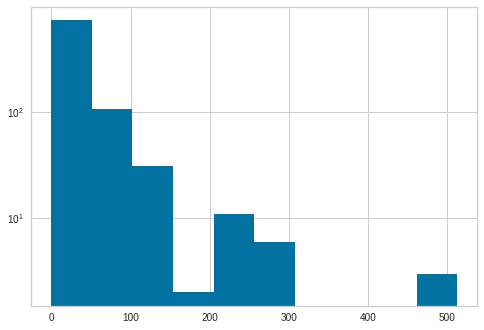

In [343]:
plt.hist(train['Fare'].values, bins=10);
plt.yscale('log')

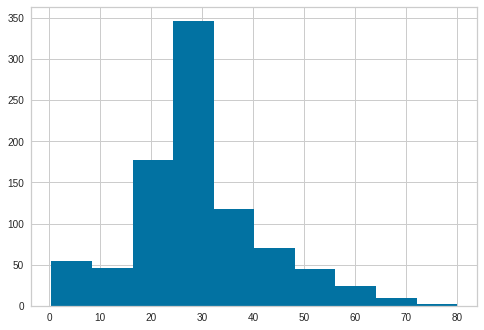

In [344]:
plt.hist(train['Age'].values, bins=10);

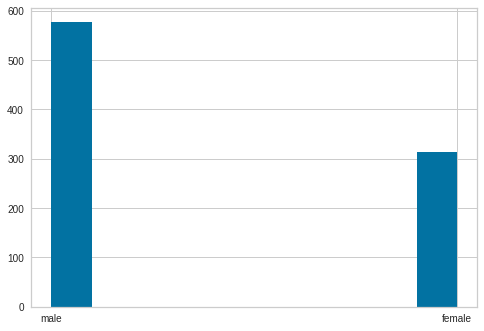

In [345]:
plt.hist(train['Sex'].values, bins=10);

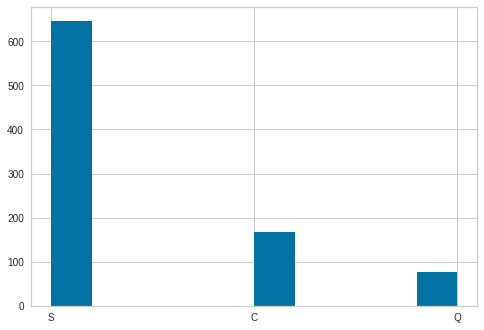

In [346]:
plt.hist(train['Embarked'].values, bins=10);

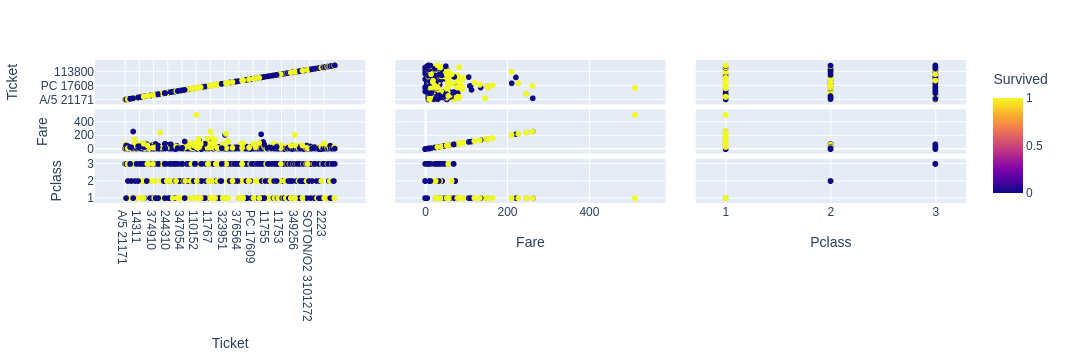

In [347]:
grafico = px.scatter_matrix(train, dimensions=['Ticket','Fare','Pclass'], color = 'Survived')
grafico.show()

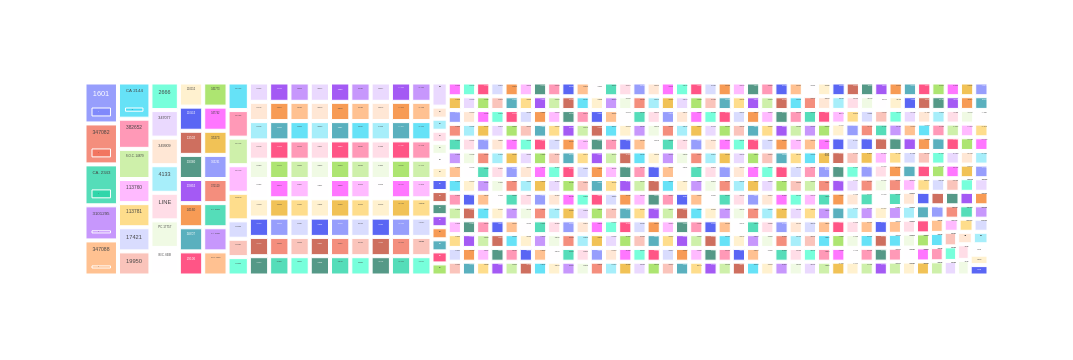

In [348]:
grafico = px.treemap(train, path=['Ticket','Pclass','Fare'])
grafico.show()

In [349]:
np.unique(train['Ticket'], return_counts=True) #cheking if data is well balanced

(array(['110152', '110413', '110465', '110564', '110813', '111240',
        '111320', '111361', '111369', '111426', '111427', '111428',
        '112050', '112052', '112053', '112058', '112059', '112277',
        '112379', '113028', '113043', '113050', '113051', '113055',
        '113056', '113059', '113501', '113503', '113505', '113509',
        '113510', '113514', '113572', '113760', '113767', '113773',
        '113776', '113781', '113783', '113784', '113786', '113787',
        '113788', '113789', '113792', '113794', '113796', '113798',
        '113800', '113803', '113804', '113806', '113807', '11668', '11751',
        '11752', '11753', '11755', '11765', '11767', '11769', '11771',
        '11774', '11813', '11967', '12233', '12460', '12749', '13049',
        '13213', '13214', '13502', '13507', '13509', '13567', '13568',
        '14311', '14312', '14313', '14973', '1601', '16966', '16988',
        '17421', '17453', '17463', '17464', '17465', '17466', '17474',
        '17764', '19877', 

There is few tickets with the same name and number. Maybe it should not be in the training.

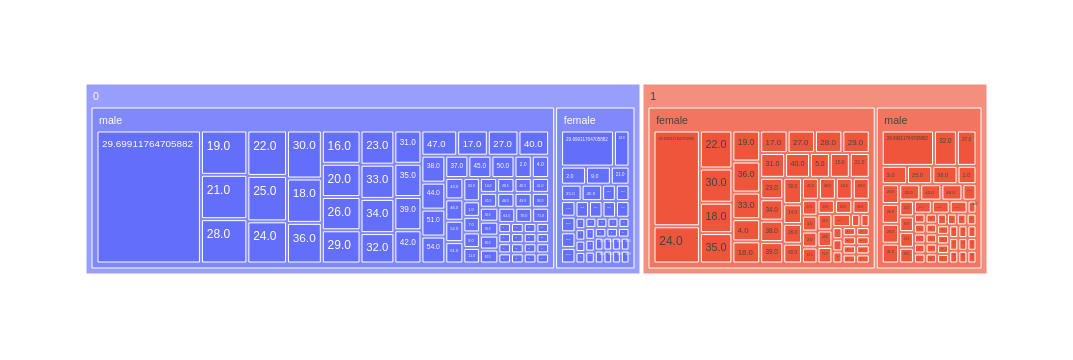

In [350]:
grafico = px.treemap(train, path=['Survived','Sex','Age'])
grafico.show()

In [351]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
#The columsn PassengerId, Name and Cabin do not have information relevant for the training
X_titanic = train.iloc[:,[2,4,5,6,7,9,11]].values
y_titanic = train.iloc[:,1].values

In [353]:
X_titanic[0]

array([3, 'male', 22.0, 1, 0, 7.25, 'S'], dtype=object)

<h2> Tratamento de dados categóricos

In [354]:
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

In [355]:
X_titanic[:,1] = label_encoder_sex.fit_transform(X_titanic[:,1])
X_titanic[:,6] = label_encoder_embarked.fit_transform(X_titanic[:,6])

X_titanic[0]

array([3, 1, 22.0, 1, 0, 7.25, 2], dtype=object)

In [356]:
X_titanic.shape

(891, 7)

<h2> Padronization of values

In [357]:
from sklearn.preprocessing import StandardScaler

scaler_titanic = StandardScaler()
X_titanic = scaler_titanic.fit_transform(X_titanic)

<h2> Split between training and test 

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X_titanic_treinamento, X_titanic_teste, y_titanic_treinamento, y_titanic_teste = train_test_split(X_titanic, y_titanic, test_size = 0.25, random_state = 0)

In [360]:
X_titanic_treinamento.shape,X_titanic_teste.shape

((668, 7), (223, 7))

In [361]:
X_titanic_treinamento[0]

array([ 0.82737724,  0.73769513, -0.1307545 , -0.4745452 , -0.47367361,
       -0.48944219,  0.58595414])

<h1> Classification

<h2> Random Forest - 85,20%

In [362]:
from sklearn.ensemble import RandomForestClassifier

random_forest_titanic = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_titanic.fit(X_titanic_treinamento,y_titanic_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [363]:
previsoes=random_forest_titanic.predict(X_titanic_teste);
accuracy_score(y_titanic_teste,previsoes)

0.8251121076233184

0.8251121076233184

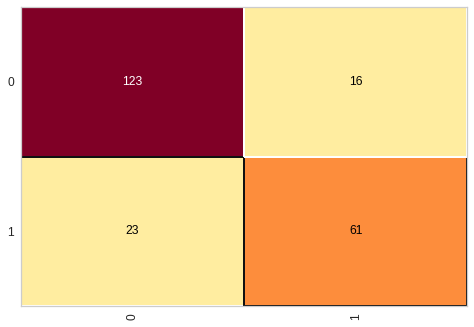

In [364]:
from yellowbrick.classifier import ConfusionMatrix
cm  = ConfusionMatrix(random_forest_titanic)
cm.fit(X_titanic_treinamento, y_titanic_treinamento)
cm.score(X_titanic_teste,y_titanic_teste)

In [365]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.79      0.73      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



<h3> Tuning the hyperparameters

In [366]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': [1,2,3,4,5,6,7,8,9,10],
    'n_estimators': [10, 50, 100, 150],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'criterion': ['entropy'],
    'random_state': [0],
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 6, verbose = 2)

In [367]:
grid_search.fit(X_titanic_treinamento, y_titanic_treinamento);

Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=2, n_estimators=10, random_state=0; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=2, n_estimators=100, random_state=0; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=3, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=3, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=3, n_estimators=50, random_state=0; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=3, n_estimators=100, random_state=0; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_features=1, min_samples_split=4, n_estimators=10, random_state=0; total time=   0.0s
[CV]

/home/hmendes/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


252 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hmendes/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hmendes/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/home/hmendes/.local/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/hmendes/.lo

In [387]:
grid_search.best_params_

{'n_neighbors': 30}

In [388]:
random_forest_titanic = RandomForestClassifier(n_estimators=50, max_features = 5, 
                                              min_samples_split= 8,criterion='entropy', 
                                              random_state=0,bootstrap= True)
random_forest_titanic.fit(X_titanic_treinamento,y_titanic_treinamento)


RandomForestClassifier(criterion='entropy', max_features=5, min_samples_split=8,
                       n_estimators=50, random_state=0)

In [389]:
previsoes=random_forest_titanic.predict(X_titanic_teste);
accuracy_score(y_titanic_teste,previsoes)

0.852017937219731

In [390]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       139
           1       0.87      0.71      0.78        84

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.84       223
weighted avg       0.85      0.85      0.85       223



<h2> kNN - 81,61%

In [372]:
from sklearn.neighbors import KNeighborsClassifier

In [373]:
knn_titanic = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_titanic.fit(X_titanic_treinamento, y_titanic_treinamento)

KNeighborsClassifier()

In [374]:
previsoes = knn_titanic.predict(X_titanic_teste)

In [375]:
accuracy_score(y_titanic_teste,previsoes)

0.7982062780269058

In [376]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.73      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



<h3> Tunning the hyperparameters

In [377]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': [1,2,5,10,15,20,30,50],
}# Create a based model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)

In [378]:
grid_search.fit(X_titanic_treinamento, y_titanic_treinamento)

[CV] END bootstrap=True, criterion=entropy, max_features=8, min_samples_split=7, n_estimators=150, random_state=0; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_features=8, min_samples_split=8, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=8, min_samples_split=8, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=9, min_samples_split=3, n_estimators=10, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=9, min_samples_split=3, n_estimators=50, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=9, min_samples_split=3, n_estimators=50, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=9, min_samples_split=3, n_estimators=50, random_state=0; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_features=9, min_samp

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 30, 50]},
             verbose=2)

In [379]:
grid_search.best_params_

{'n_neighbors': 30}

In [380]:
knn_titanic = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p = 2)
knn_titanic.fit(X_titanic_treinamento, y_titanic_treinamento)

KNeighborsClassifier(n_neighbors=30)

In [381]:
previsoes = knn_titanic.predict(X_titanic_teste)

In [382]:
accuracy_score(y_titanic_teste,previsoes)

0.8161434977578476

In [383]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       139
           1       0.77      0.73      0.75        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.81       223



<h2> Logistic Regression - 79,37%

In [384]:
from sklearn.linear_model import LogisticRegression

In [396]:
logistic_titanic= LogisticRegression(random_state = 1)
logistic_titanic.fit(X_titanic_treinamento,y_titanic_treinamento)

LogisticRegression(random_state=1)

In [397]:
previsoes = logistic_titanic.predict(X_titanic_teste)
accuracy_score(y_titanic_teste,previsoes)

0.7937219730941704

In [398]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.73      0.73      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=50; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END ................

<h2> SVM

In [430]:
from sklearn.svm import SVC
svm_titanic = SVC(kernel='rbf', C=1, random_state=1)
svm_titanic.fit(X_titanic_treinamento, y_titanic_treinamento)

SVC(C=1, random_state=1)

In [431]:
previsoes = svm_titanic.predict(X_titanic_teste)
accuracy_score(y_titanic_teste, previsoes)

0.8071748878923767

In [432]:
print(classification_report(y_titanic_teste, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       139
           1       0.77      0.70      0.73        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

